**Importing and Installing Libraries**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%pip install optuna
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 14.9 MB/s eta 0:00:00


**Read the Input File for training**

In [10]:
df=pd.read_csv('train.csv')

**Basic EDA on Data**

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Check for null and missing values in train dataset
print("Missing values in train dataset:")
print(df.isnull().sum())

Missing values in train dataset:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [12]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


**Basic Visualization to Represent Data**

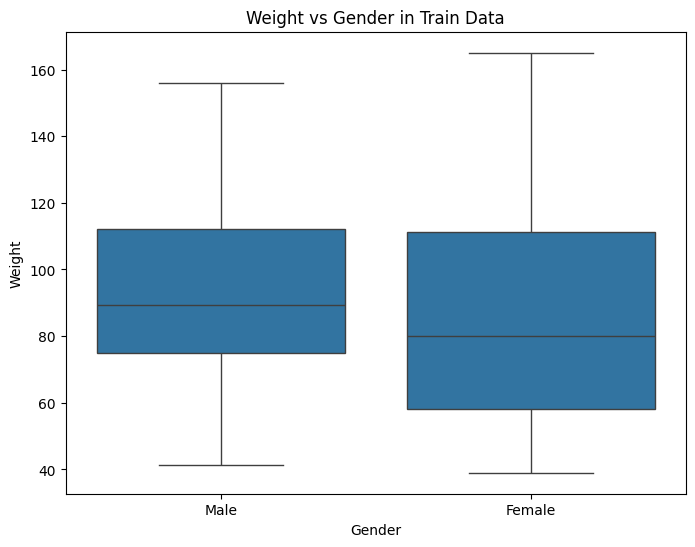

In [13]:
# Plot Weight vs Gender (using boxplot for distribution) for train data
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Weight', data=df)
plt.title('Weight vs Gender in Train Data')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

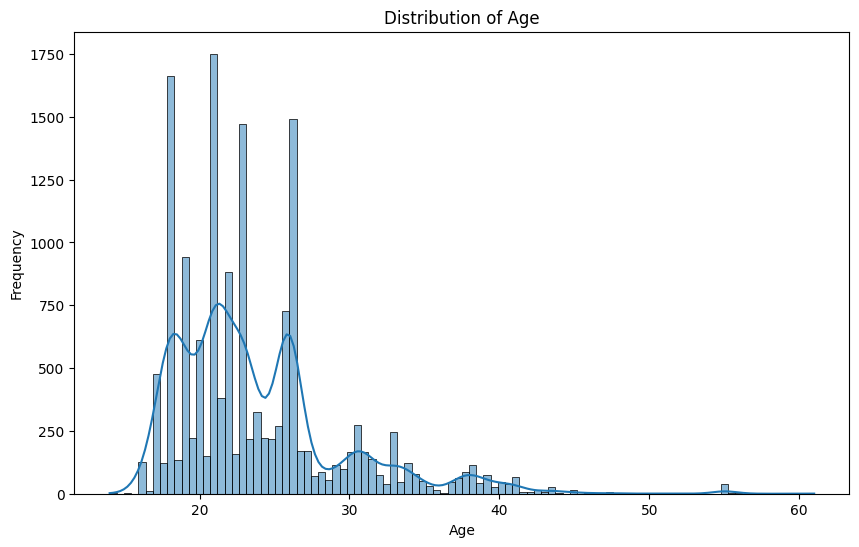

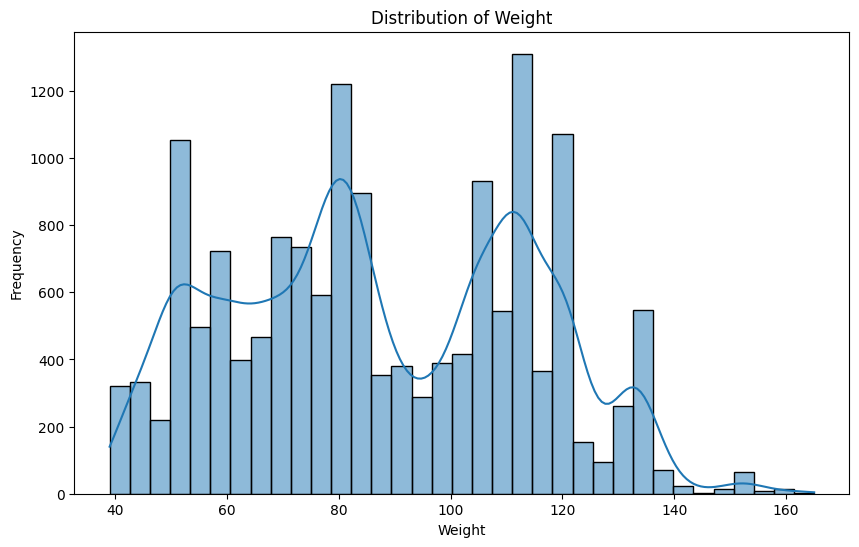

In [15]:
# Plot histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for Weight
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight', kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

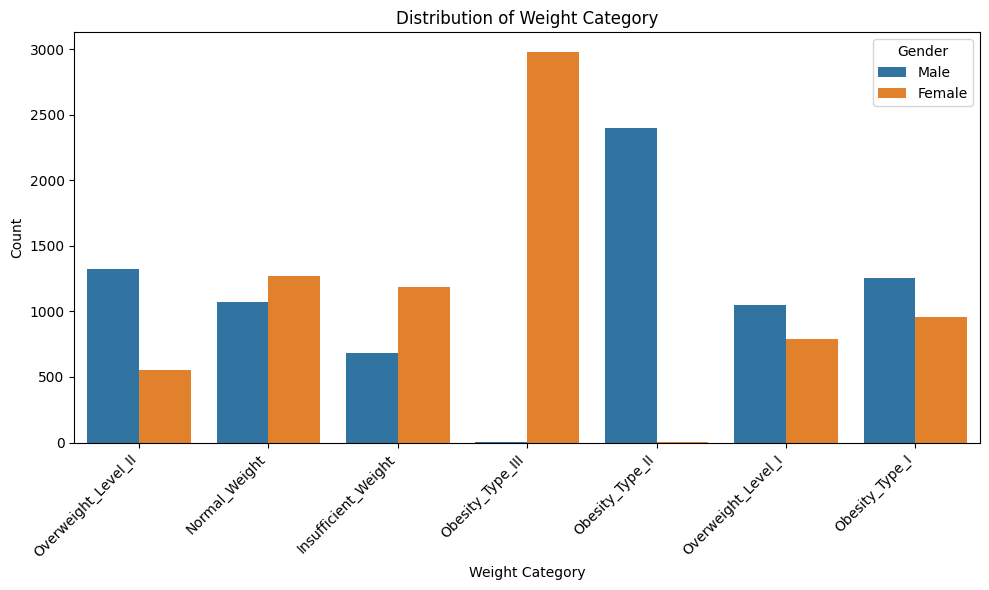

In [17]:
# Plot bar chart for WeightCategory
plt.figure(figsize=(10, 6))
sns.countplot(x='WeightCategory',hue='Gender', data=df)
plt.title('Distribution of Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

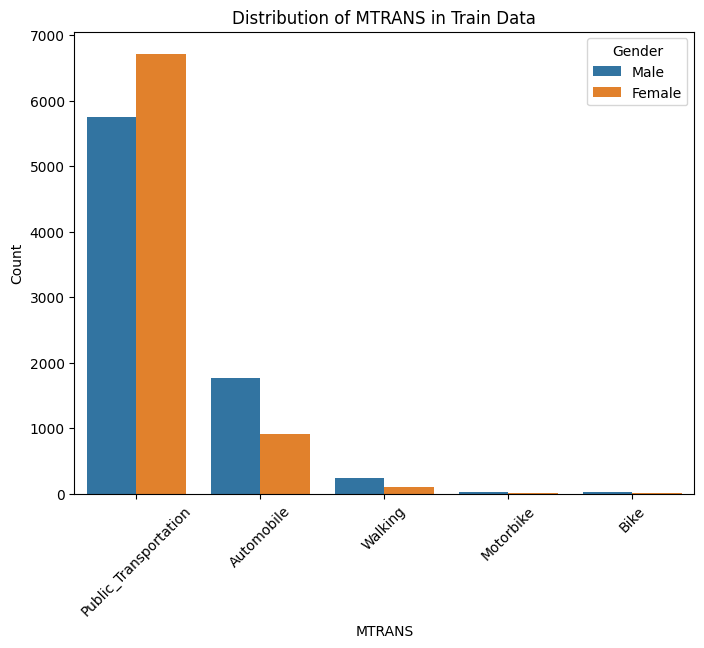

In [18]:
# Plot bar chart for categorical features (example: MTRANS) in train data
plt.figure(figsize=(8, 6))
sns.countplot(x='MTRANS',hue='Gender', data=df)
plt.title('Distribution of MTRANS in Train Data')
plt.xlabel('MTRANS')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Splitting the Data for Model Training**

In [19]:
from sklearn.model_selection import train_test_split

# Drop original 'WeightCategory', 'id' columns
y = df['WeightCategory']
X = df.drop(['WeightCategory', 'id'], axis=1)

categorical_cols_X = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols_X, dummy_na=False, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
12777,35.389491,1.678050,73.810728,3.000000,3.000000,1.000000,1.974656,0.000000,True,False,...,True,False,False,False,True,True,False,False,False,False
10633,38.397463,1.525234,62.339003,2.278644,2.880817,1.000000,0.000000,0.000000,True,False,...,True,False,False,False,True,True,False,False,False,False
11149,21.568951,1.622397,62.871794,2.000000,1.293342,1.429687,0.062932,0.000000,True,False,...,True,False,False,True,False,False,False,False,True,False
9727,20.586978,1.726606,131.567481,3.000000,3.000000,1.651462,1.469928,0.947091,True,False,...,True,False,False,True,False,False,False,False,True,False
4147,21.635977,1.790151,106.875927,2.000000,3.000000,2.654517,0.000000,0.540812,False,True,...,True,False,False,True,False,False,False,False,True,False


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
10986,26.000000,1.624134,111.357062,3.000000,3.000000,2.619517,0.000000,0.096576,True,False,...,True,False,False,True,False,False,False,False,True,False
8878,19.773303,1.755938,42.000000,3.000000,1.000000,1.606076,0.826609,0.000000,True,False,...,True,False,False,True,False,False,False,False,True,False
1346,21.000000,1.690000,53.000000,2.000000,3.000000,3.000000,2.000000,1.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
2099,24.443011,1.859056,121.639178,2.328469,2.658837,2.487070,0.742113,0.000000,False,True,...,True,False,False,True,False,True,False,False,False,False
11498,18.000000,1.843841,60.000000,3.000000,4.000000,2.000000,2.000000,0.000000,False,True,...,True,False,False,True,False,True,False,False,False,False


,WeightCategory
12777,Overweight_Level_I
10633,Overweight_Level_II
11149,Overweight_Level_I
9727,Obesity_Type_III
4147,Obesity_Type_I


,WeightCategory
10986,Obesity_Type_III
8878,Insufficient_Weight
1346,Normal_Weight
2099,Obesity_Type_II
11498,Insufficient_Weight


**Importing Libraries and Encoding Target Variable for Training the Models**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train_encoded)
y_pred_lr_encoded = lr_model.predict(X_test)
y_pred_lr = le.inverse_transform(y_pred_lr_encoded)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Evaluation Metrics:")
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print("-" * 30)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_encoded)
y_pred_dt_encoded = dt_model.predict(X_test)
y_pred_dt = le.inverse_transform(y_pred_dt_encoded)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Evaluation Metrics:")
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print("-" * 30)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)
y_pred_rf_encoded = rf_model.predict(X_test)
y_pred_rf = le.inverse_transform(y_pred_rf_encoded)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Evaluation Metrics:")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print("-" * 30)

# XGBoost
xgb_model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = xgb_model.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Evaluation Metrics:")
print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print("-" * 30)

Logistic Regression Evaluation Metrics:
Accuracy: 0.8375
Precision: 0.8351
Recall: 0.8375
------------------------------
Decision Tree Evaluation Metrics:
Accuracy: 0.8404
Precision: 0.8426
Recall: 0.8404
------------------------------
Random Forest Evaluation Metrics:
Accuracy: 0.8838
Precision: 0.8846
Recall: 0.8838
------------------------------
XGBoost Evaluation Metrics:
Accuracy: 0.8989
Precision: 0.8998
Recall: 0.8989
------------------------------


**Tuning Parameters for xgboost as it achieved the highest accuracy**

In [22]:
import optuna

def objective(trial):
    xgb_params = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'n_estimators': trial.suggest_int('n_estimators', 500,650),
        'max_depth': trial.suggest_int('max_depth', 11, 18),
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
        'min_child_weight': trial.suggest_float('min_child_weight', 15, 20),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1),
        'subsample': trial.suggest_float('subsample', 0.6, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1),
        'grow_policy':'depthwise'
    }
    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters found by Optuna:")
print(study.best_params)
print("Best accuracy score achieved during optimization:")
print(study.best_value)

[I 2025-10-26 17:09:59,839] A new study created in memory with name: no-name-b2a3a745-a978-41e6-ab32-df2e8a5364ef
[I 2025-10-26 17:10:05,631] Trial 0 finished with value: 0.9008690054715159 and parameters: {'n_estimators': 574, 'max_depth': 13, 'learning_rate': 0.09854682633667172, 'min_child_weight': 18.843577387027995, 'gamma': 0.18995755871681352, 'colsample_bytree': 0.8957052645130135, 'subsample': 0.9951381634799361, 'reg_alpha': 0.23863234771247793, 'reg_lambda': 0.35510661805985516}. Best is trial 0 with value: 0.9008690054715159.
[I 2025-10-26 17:10:14,039] Trial 1 finished with value: 0.9018345671065336 and parameters: {'n_estimators': 632, 'max_depth': 13, 'learning_rate': 0.07128206194515493, 'min_child_weight': 16.17383466942403, 'gamma': 0.5653759123899219, 'colsample_bytree': 0.7995563017574425, 'subsample': 0.7582871337038318, 'reg_alpha': 0.8432431432726386, 'reg_lambda': 0.5368511975265681}. Best is trial 1 with value: 0.9018345671065336.
[I 2025-10-26 17:10:20,616] Tr

Best hyperparameters found by Optuna:
{'n_estimators': 606, 'max_depth': 16, 'learning_rate': 0.03093073539407392, 'min_child_weight': 15.037540376536308, 'gamma': 0.3848617712348458, 'colsample_bytree': 0.3055025609431128, 'subsample': 0.6096917494911344, 'reg_alpha': 0.9907271206295939, 'reg_lambda': 0.0332017121332316}
Best accuracy score achieved during optimization:
0.9114901834567106


**Using the best Parameters for Training the Model**

In [40]:
xgb_params = {
    'n_estimators':606,
    'max_depth': 16,
    'learning_rate':0.03093073539407392,
    'min_child_weight': 15.037540376536308,
    'gamma':0.3848617712348458,
    'colsample_bytree':0.3055025609431128,
    'subsample':0.6096917494911344,
    'reg_alpha':0.9907271206295939,
    'reg_lambda':0.0332017121332316
}

In [41]:
# Initialize the XGBoost classifier with the specified parameters
tuned_xgb_model = XGBClassifier(
    objective= 'multi:softprob',
    grow_policy='depthwise',
    eval_metric = 'mlogloss',**xgb_params
)
tuned_xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3055025609431128, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0.3848617712348458, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03093073539407392, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=15.037540376536308, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=606,
              n_jobs=None, num_parallel_tree=None, ...)

**Evaluating the Model Performance**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_encoded_tuned = tuned_xgb_model.predict(X_test)

y_pred_tuned = le.inverse_transform(y_pred_encoded_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("Tuned Model Evaluation Metrics:")
print(f'Accuracy: {accuracy_tuned:.4f}')
print(f'Precision: {precision_tuned:.16f}')
print(f'Recall: {recall_tuned:.16f}')
print(f'F1-score: {f1_tuned:.16f}')

Tuned Model Evaluation Metrics:
Accuracy: 0.9115
Precision: 0.9119297295782876
Recall: 0.9114901834567106
F1-score: 0.9116268700047584


**Print the Confusion Matrix**

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tuned)
class_labels = le.classes_
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
print("Confusion Matrix for Tuned XGBoost Model:")
display(cm_df)

Confusion Matrix for Tuned XGBoost Model:


,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Insufficient_Weight,319,24,0,1,0,1,1
Normal_Weight,14,445,1,0,0,31,5
Obesity_Type_I,0,0,402,9,2,13,22
Obesity_Type_II,0,0,9,454,0,0,1
Obesity_Type_III,0,0,2,1,603,0,0
Overweight_Level_I,2,31,6,0,0,305,40
Overweight_Level_II,0,7,18,3,0,31,304


**Creating the Submission File.**

In [44]:
df_test = pd.read_csv('test.csv')

X_test_submission = df_test.drop('id', axis=1)
categorical_cols_test = X_test_submission.select_dtypes(include=['object', 'category']).columns
X_test_encoded_submission = pd.get_dummies(X_test_submission, columns=categorical_cols_test, dummy_na=False, drop_first=False)

y_pred_encoded_submission = tuned_xgb_model.predict(X_test_encoded_submission)

y_pred_submission = le.inverse_transform(y_pred_encoded_submission)

submission_df = pd.DataFrame({'id': df_test['id'], 'WeightCategory': y_pred_submission})

submission_df.to_csv('submission.csv', index=False)

display(submission_df.head())

,id,WeightCategory
0,15533,Obesity_Type_III
1,15534,Overweight_Level_I
2,15535,Overweight_Level_II
3,15536,Obesity_Type_II
4,15537,Normal_Weight
